In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab import drive

## 1. Mount google drive & name it /mydrive/

In [ ]:
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
'Getting started.pdf'  'My Drive'  'Proposal Skripsi.gdoc'   Work   yolov3


In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14291, done.
remote: Total 14291 (delta 0), reused 0 (delta 0), pack-reused 14291
Receiving objects: 100% (14291/14291), 12.85 MiB | 20.72 MiB/s, done.
Resolving deltas: 100% (9752/9752), done.


In [ ]:
!ls

darknet  gdrive  sample_data


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

## 3. Make a copy & rename the configuration file

In [7]:
%cd darknet
!cp cfg/yolov3.cfg cfg/yolov3_ff_profile.cfg

/content/darknet


In [8]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_ff_profile.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_ff_profile.cfg
!sed -i 's/max_batches = 500200/max_batches = 12000/' cfg/yolov3_ff_profile.cfg
!sed -i '610 s@classes=80@classes=6@' cfg/yolov3_ff_profile.cfg
!sed -i '696 s@classes=80@classes=6@' cfg/yolov3_ff_profile.cfg
!sed -i '783 s@classes=80@classes=6@' cfg/yolov3_ff_profile.cfg
!sed -i '603 s@filters=255@filters=33@' cfg/yolov3_ff_profile.cfg
!sed -i '689 s@filters=255@filters=33@' cfg/yolov3_ff_profile.cfg
!sed -i '776 s@filters=255@filters=33@' cfg/yolov3_ff_profile.cfg

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov3/FF_Profile.zip -d data/obj

!echo -e "id\nusername\nguild\nscore\nrank\nseasonal_rank" > data/obj.names
!echo -e 'classes= 6\ntrain = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3/ff_profile' > data/obj.data

Archive:  /mydrive/yolov3/FF_Profile.zip
  inflating: data/obj/ffp1.txt       
  inflating: data/obj/ffp2.jpg       
  inflating: data/obj/ffp2.txt       
  inflating: data/obj/ffp3.png       
  inflating: data/obj/ffp3.txt       
  inflating: data/obj/ffp4.jpg       
  inflating: data/obj/ffp4.txt       
  inflating: data/obj/ffp5.png       
  inflating: data/obj/ffp5.txt       
  inflating: data/obj/sample1.jpg    
  inflating: data/obj/sample1.txt    
  inflating: data/obj/sample2.jpg    
  inflating: data/obj/sample2.txt    
  inflating: data/obj/sample3.jpg    
  inflating: data/obj/sample3.txt    
  inflating: data/obj/sample4.jpg    
  inflating: data/obj/sample4.txt    
  inflating: data/obj/sample5.jpg    
  inflating: data/obj/sample5.txt    
  inflating: data/obj/sample6.jpg    
  inflating: data/obj/sample6.txt    
  inflating: data/obj/sample7.jpg    
  inflating: data/obj/sample7.txt    
  inflating: data/obj/ffp1.jpg       


In [ ]:
images_list = glob.glob("data/obj/*[jpg|png|jpeg]")
print(images_list)

#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['data/obj/ffp5.png', 'data/obj/ffp3.png', 'data/obj/ffp1.jpg', 'data/obj/sample2.jpg', 'data/obj/sample1.jpg', 'data/obj/sample5.jpg', 'data/obj/ffp2.jpg', 'data/obj/sample4.jpg', 'data/obj/ffp4.jpg', 'data/obj/sample7.jpg', 'data/obj/sample3.jpg', 'data/obj/sample6.jpg']


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-01 07:15:52--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   114KB/s    in 14m 32s 

2020-09-01 07:30:26 (182 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_ff_profile.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 1376: 0.250953, 0.313636 avg loss, 0.001000 rate, 2.460361 seconds, 88064 images, 11.250798 hours left
Loaded: 0.000045 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000008, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.842673, GIOU: 0.842485), Class: 0.999140, Obj: 0.986691, No Obj: 0.000596, .5R: 1.000000, .75R: 0.666667, count: 3, class_loss = 0.001253, iou_loss = 0.052154, total_loss = 0.053406 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.797242, GIOU: 0.790962), Class: 0.996135, Obj: 0.900189, No Obj: 0.000807, .5R: 1.000000, .75R: 0.692308, count: 13, class_loss = 0.459524, iou_loss = 0.380691, total_loss = 0.840215 
 total_bbox = 428810, rewritten_bbox = 0.000000 % 
v3 (m

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_ff_profile.cfg /mydrive/yolov3/ff_profile/yolov3_ff_profile_last.weights -thresh 0.25

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

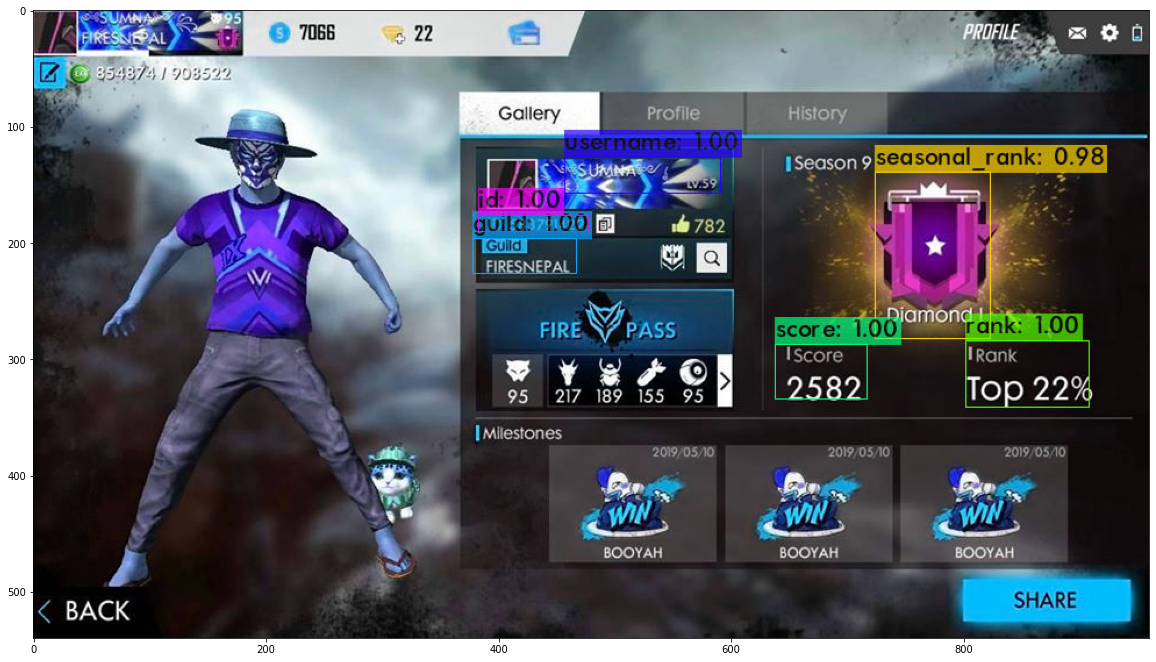

In [ ]:
pred = cv2.imread('predictions.jpg')
plt.figure(figsize=(20,20))
plt.imshow(pred)